Plotting Schlumberger Sounding Data
===============================

This notebook will allow you to:
- Load basic text files containing sounding data
- Plot the apparent resistivities as a function of electrode spacing for one or multiple sites

By examining the apparent resistivity curves as a function of electrode spacing, we can get a sense as to how the electrical resistivity of the Earth changes with depth. We can also see how the resistivity profile changes from one location to another.

Import Modules
----------------------

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

User Defined Parameters for the Notebook
-------------------------------------------------------------

In the cell below, the user defines the parameters needed to run the notebook. These parameters are as follows:
- **data_filenames:** The path to the text file that contains the sounding data. To plot multiple locations at once, place the file paths in a list.
- **half_AB_column:** The column in the text file that has the AB/2 values. Remember that in python, 0 is the 1st column
- **half_MN_column:** The column in the text file that has the MN/2 values. Remember that in python, 0 is the 1st column
- **apparent_resistivity_column:** The column in the text file that has the apparent resistivity values

In [2]:
# Define the file path to the data file. Also define the AB/2, MN/2 and apparent resistivity columns.
# Recall that python counts starting at 0
data_filenames = [
    './assets/Mawlamyaing_data_locations_1.txt',
    './assets/Mawlamyaing_data_locations_2.txt',
    './assets/Mawlamyaing_data_locations_3.txt',
    './assets/Mawlamyaing_data_locations_4.txt'
]# Can be string or list of strings
half_AB_column = 0
half_MN_column = 1
apparent_resistivity_column = 6

Plotting Apparent Resistivity Curves
----------------------------------------------------

The commands entered in the cell below will loop over the list of text files, load the data, and plot the apparent resistivity curves on a log-log plot.

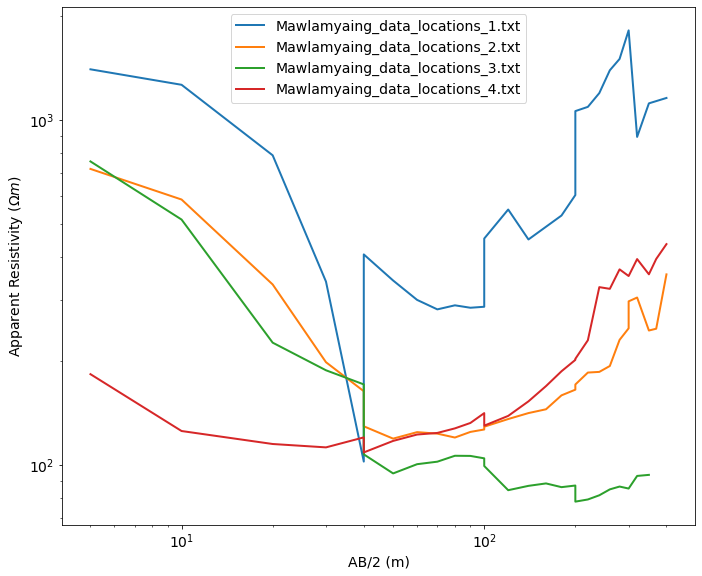

In [4]:
if isinstance(data_filenames, str):
    data_filenames = [data_filenames]

mpl.rcParams.update({'font.size': 14})
fig = plt.figure(figsize=(11, 8))
ax1 = fig.add_axes([0.05, 0.05, 0.8, 0.9])

legend_id = []

for ii in range(0, len(data_filenames)):

    # Load data
    dobs = np.loadtxt(str(data_filenames[ii]), skiprows=1)

    # Extract source and receiver electrode locations and the observed data
    half_AB_separations = dobs[:, half_AB_column]
    half_MN_separations = dobs[:, half_MN_column]
    dobs = dobs[:, apparent_resistivity_column]

    ax1.loglog(half_AB_separations, dobs, lw=2)
    
ax1.set_xlabel("AB/2 (m)")
ax1.set_ylabel("Apparent Resistivity ($\Omega m$)")
ax1.legend(data_filenames)
plt.show()